In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy.polynomial.chebyshev as C

In [2]:
t = np.linspace(0, 1, 100)
x = np.sin(t * 2 * np.pi)
y = np.cos(t * 2 * np.pi)

z = np.column_stack([x, y])

In [3]:
z.shape

(100, 2)

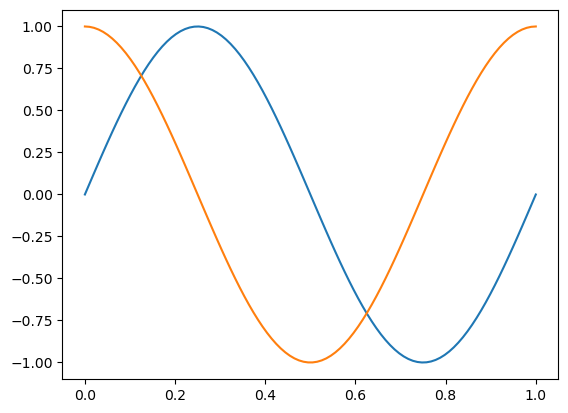

In [4]:
plt.plot(t, z)

In [5]:
coords = C.chebfit(t, z, deg=3)
coords.shape

(4, 2)

In [6]:
from numpy.polynomial.chebyshev import chebfit, chebval

class ChebTraj:
    "Chebyshev representation of a vector-valued trajectory."

    def __init__(self, t, z, deg_list):
        self.degs = deg_list
        assert z.shape == (len(t), len(deg_list))

        self.coords = []
        for i, d in enumerate(self.degs):
            self.coords.append(chebfit(t, z[:, i], deg=d))

    def __call__(self, t):
        "Evaluate the trajectory at some points."
        vals = []
        for coord in self.coords:
            vals.append(chebval(t, coord))
        return np.column_stack(vals)

In [7]:
c = ChebTraj(t, z, [2, 3])

In [8]:
c.coords

[array([ 9.26348889e-01, -1.85269778e+00,  1.46387950e-15]),
 array([ 5.97134182e+00, -8.96465073e+00,  4.48232537e+00, -3.99047457e-15])]

## Trying out interesting trajectories

In [9]:
t = np.linspace(0, 5, 200)
x = t - np.sin(2 * np.pi * t)
y = 1 - np.cos(2 * np.pi * t)
z = np.column_stack([x, y])

In [26]:
c = ChebTraj(t, z, [17, 17])
vals = c(t)

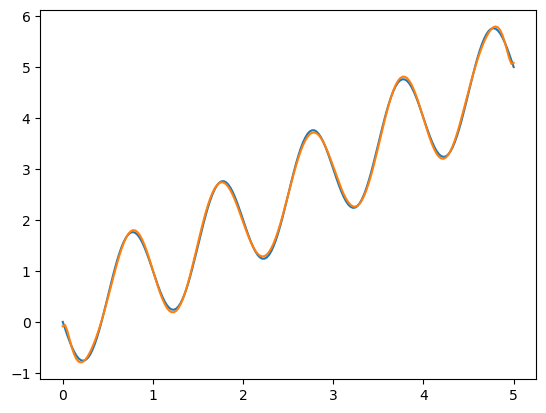

In [28]:
plt.plot(t, x)
plt.plot(t, vals[:, 0])

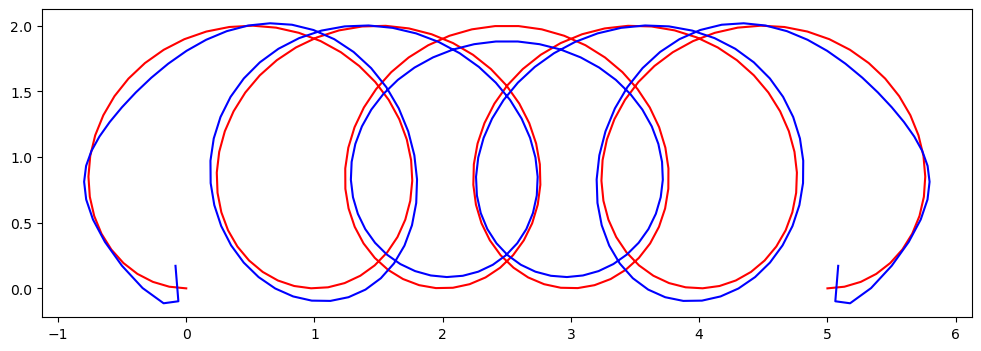

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, 'r')
ax.plot(vals[:,0], vals[:,1], 'b')

Chebyshev basis isn't very good at representing this trajectory. It takes ~40 params to get a decent approximation.

## Trying out a different basis

In [30]:
from skfda.representation.basis import FourierBasis, BSplineBasis
from skfda.representation.basis import VectorValuedBasis
from skfda.representation.grid import FDataGrid

In [92]:
xbasis = BSplineBasis((0, 5), n_basis=20)
ybasis = BSplineBasis((0, 5), n_basis=20)

basis = VectorValuedBasis([xbasis, ybasis])

In [93]:
t.shape, z.shape

((200,), (200, 2))

In [94]:
grid = FDataGrid(z.reshape(1, 200, 2), t)

In [95]:
c = grid.to_basis(basis)

In [96]:
vals = c(t).reshape(200, 2)

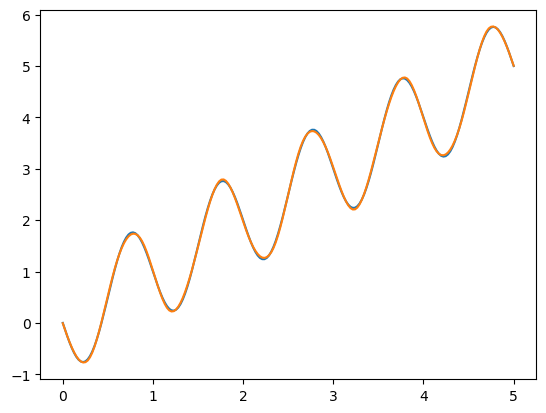

In [97]:
plt.plot(t, x)
plt.plot(t, vals[:, 0])

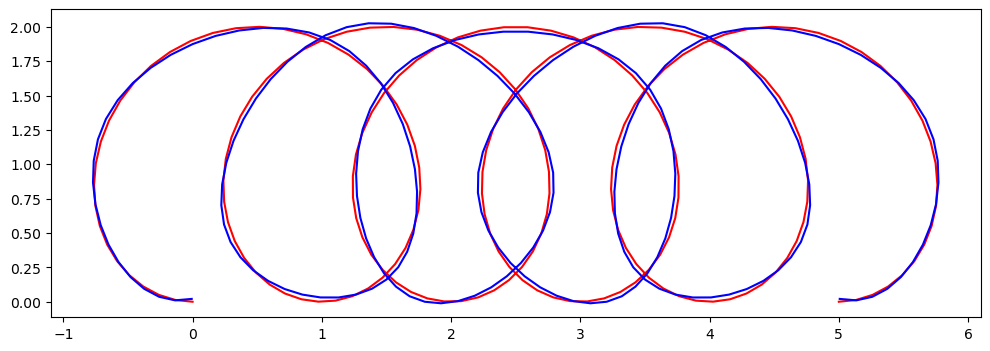

In [98]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, 'r')
ax.plot(vals[:,0], vals[:,1], 'b')